# Import essential libraries for a classification task

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Read and Visualize data

In [2]:
df=pd.read_csv(r'D:\Downloads\loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


# Drop non important Features

In [6]:
df.drop(columns=['loan_id'], inplace=True, errors='ignore')
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# NO missing data 

In [7]:
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

###  Divide features into numerical and categorical, then further divide numerical into discrete and continuous, and visualize them


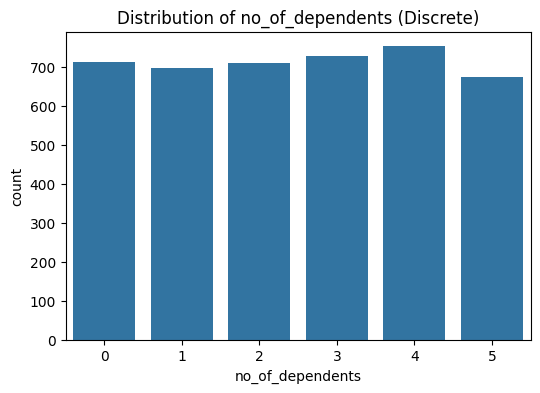

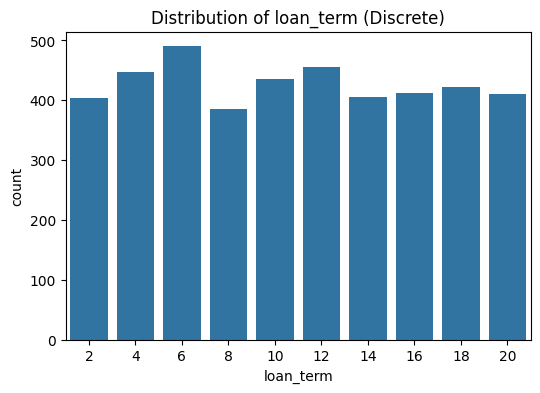

In [38]:

from pandas.api.types import is_numeric_dtype
df.columns = df.columns.str.strip()
numerical_features = [
    'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
    'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'
 ]
categorical_features = ['education', 'self_employed', 'loan_status']
# Divide numerical features into discrete and continuous
discrete_features = ['no_of_dependents', 'loan_term']
continuous_features = [f for f in numerical_features if f not in discrete_features]
# Visualize discrete features
for feature in discrete_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[feature])
    plt.title(f'Distribution of {feature} (Discrete)')
    plt.show()


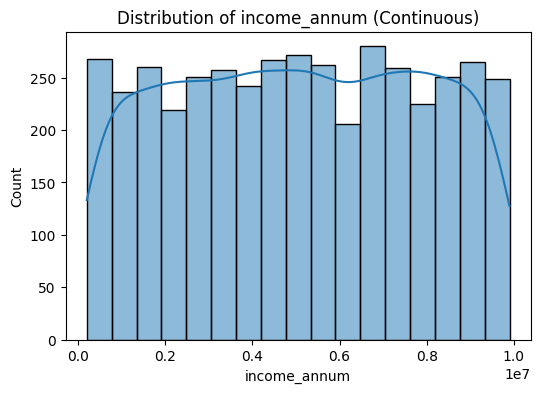

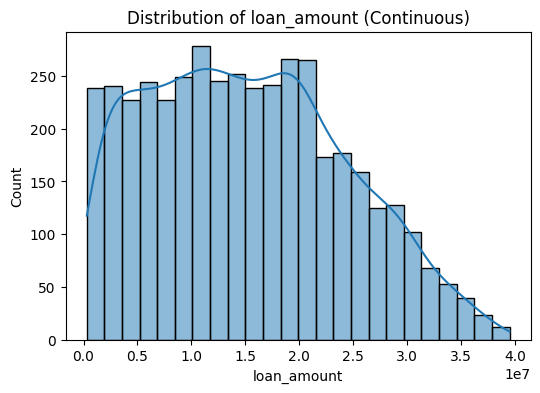

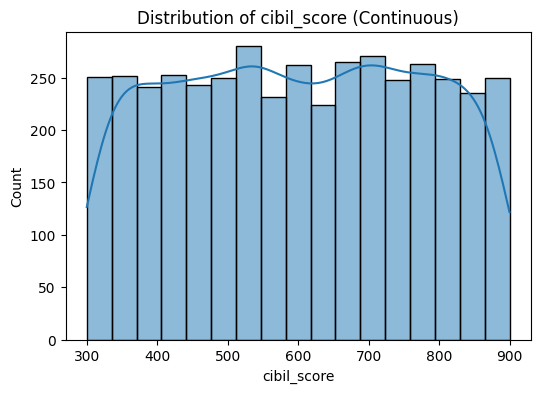

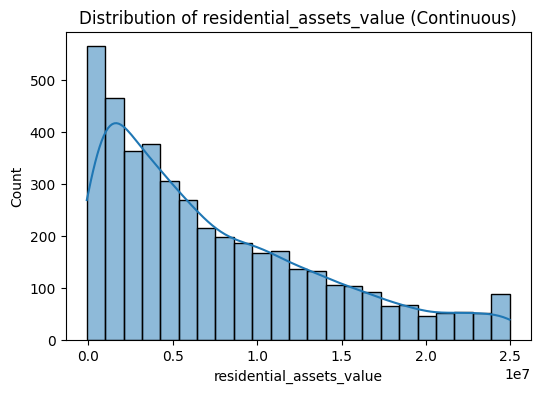

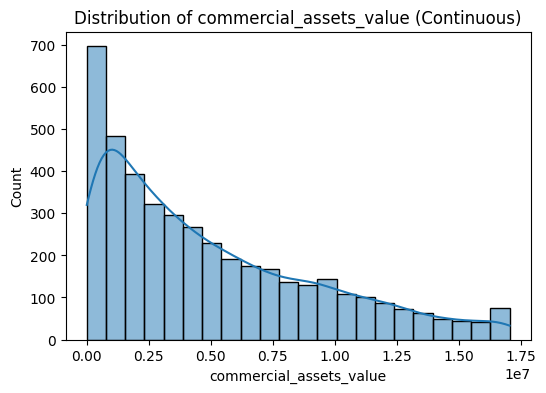

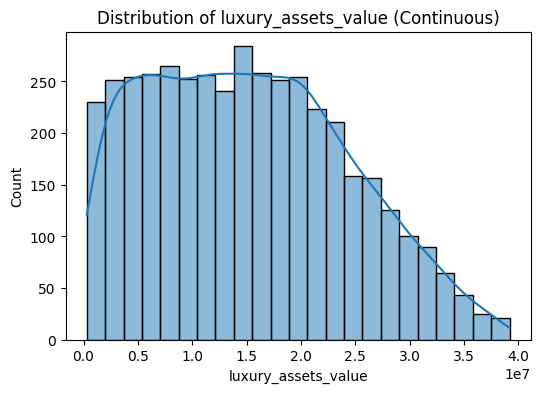

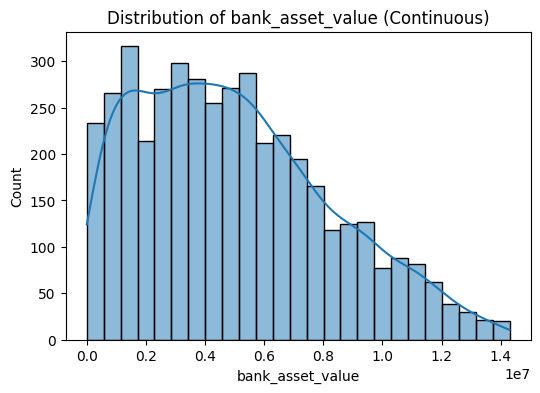

In [39]:
# Visualize continuous features
for feature in continuous_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature} (Continuous)')
    plt.show()


### All continous features is skewed except cibil_score , income annum

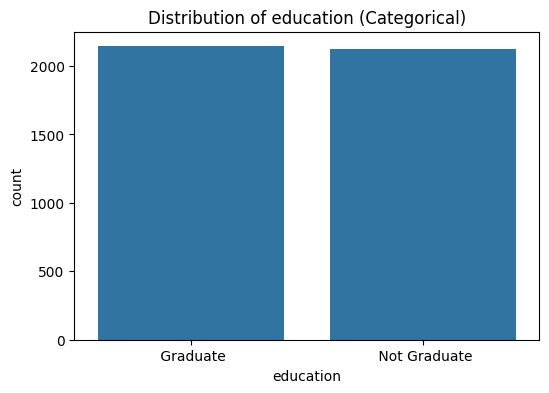

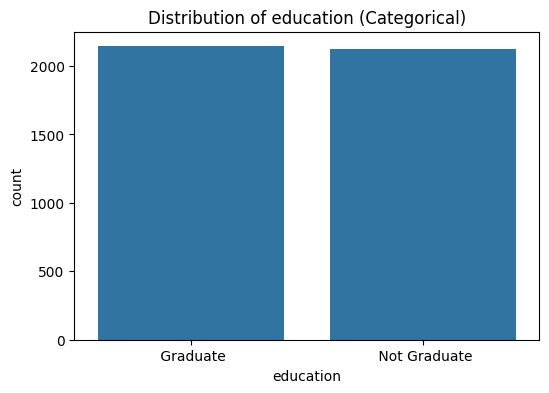

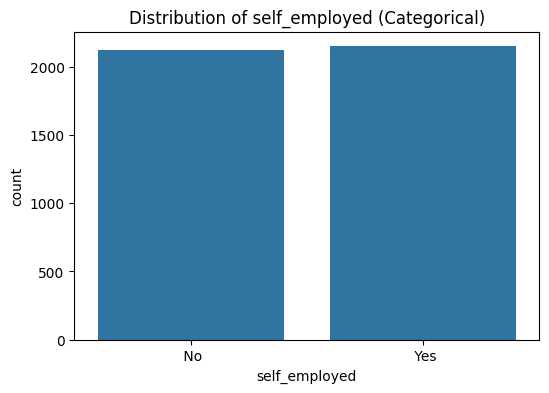

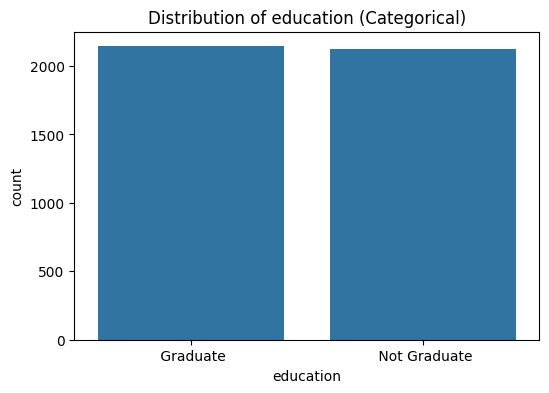

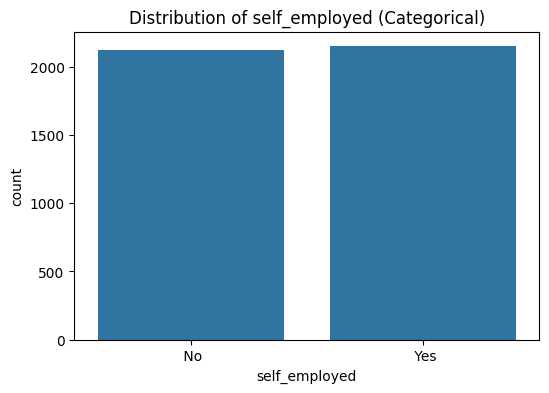

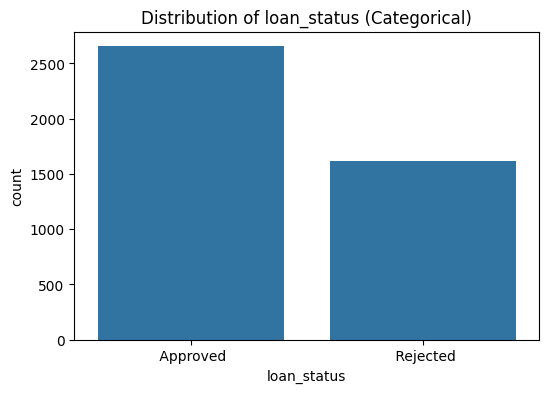

In [10]:
# Visualize categorical features
for feature in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[feature])
    plt.title(f'Distribution of {feature} (Categorical)')
    plt.show()

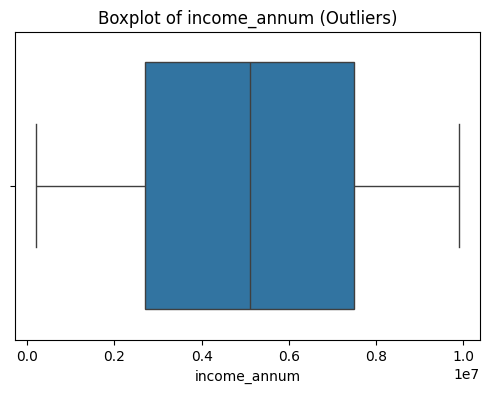

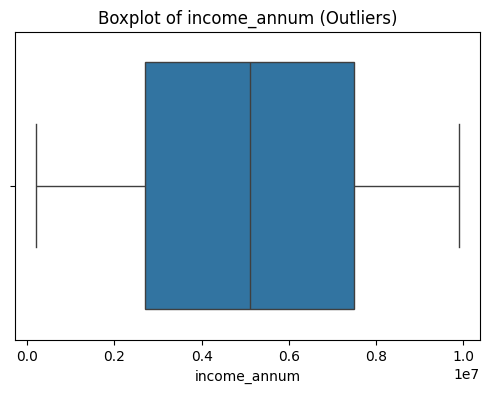

<Figure size 600x400 with 0 Axes>

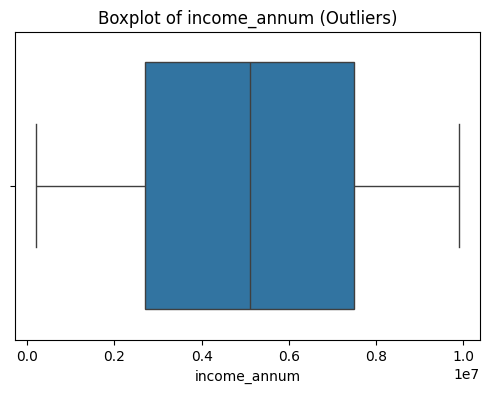

<Figure size 600x400 with 0 Axes>

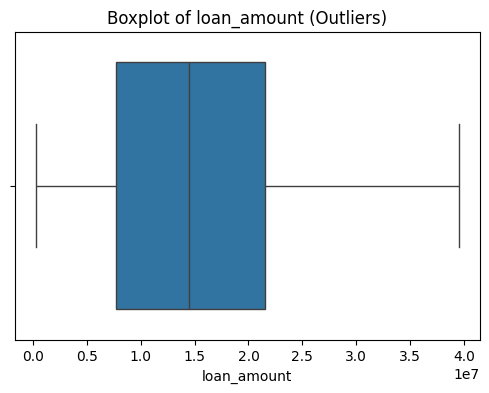

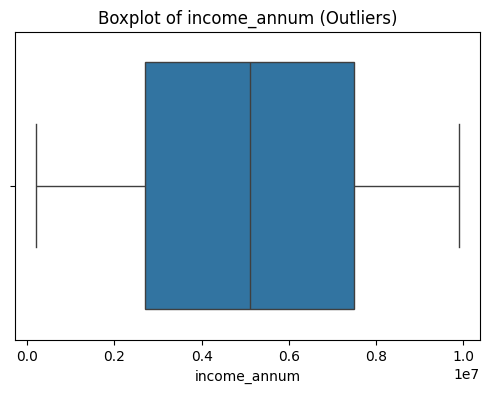

<Figure size 600x400 with 0 Axes>

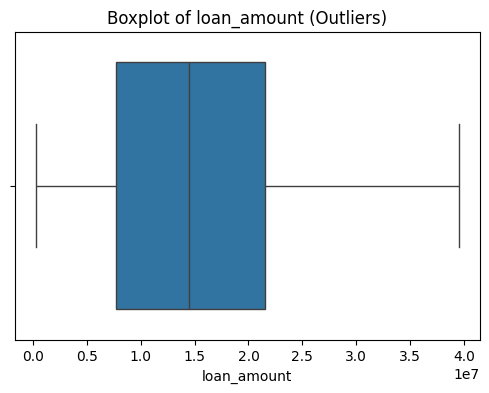

<Figure size 600x400 with 0 Axes>

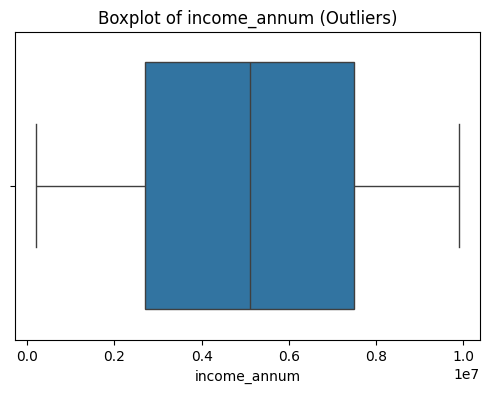

<Figure size 600x400 with 0 Axes>

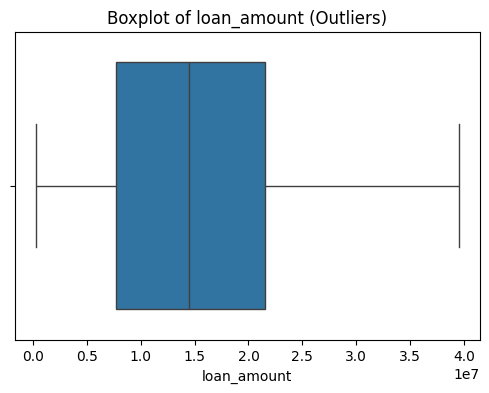

<Figure size 600x400 with 0 Axes>

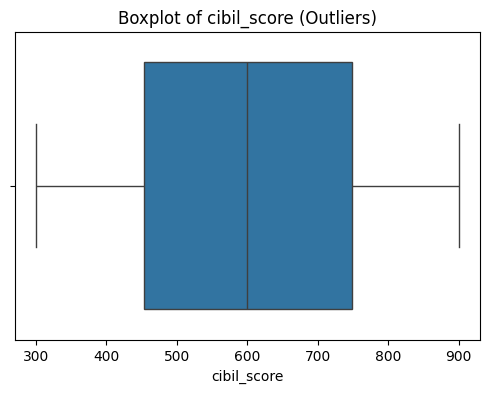

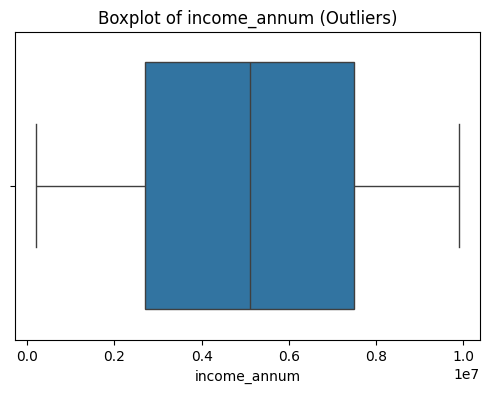

<Figure size 600x400 with 0 Axes>

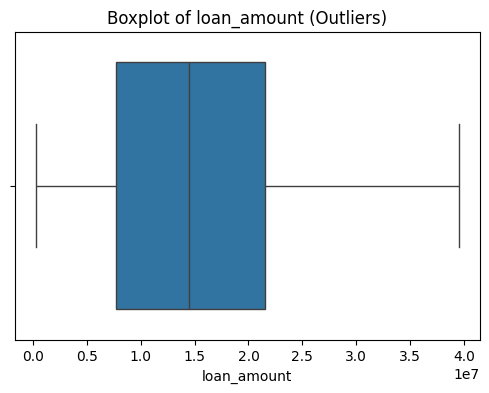

<Figure size 600x400 with 0 Axes>

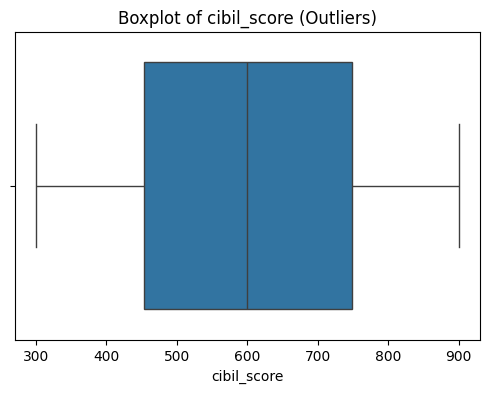

<Figure size 600x400 with 0 Axes>

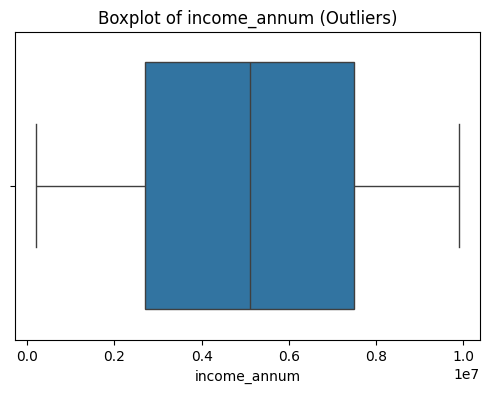

<Figure size 600x400 with 0 Axes>

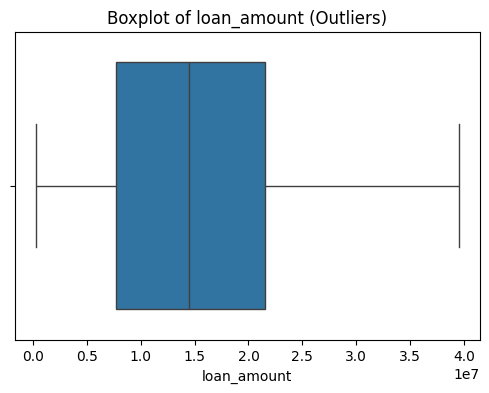

<Figure size 600x400 with 0 Axes>

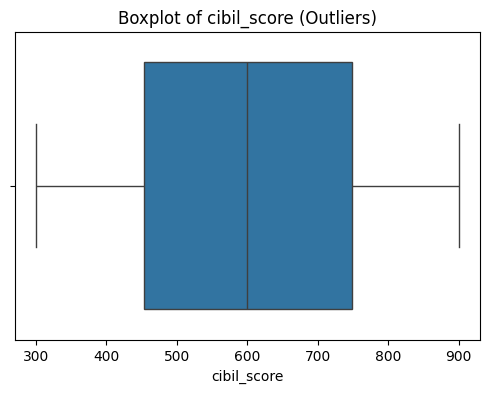

<Figure size 600x400 with 0 Axes>

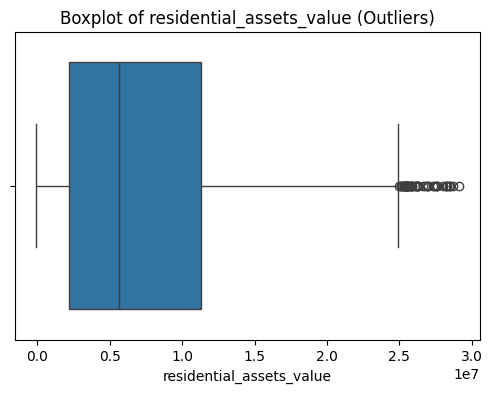

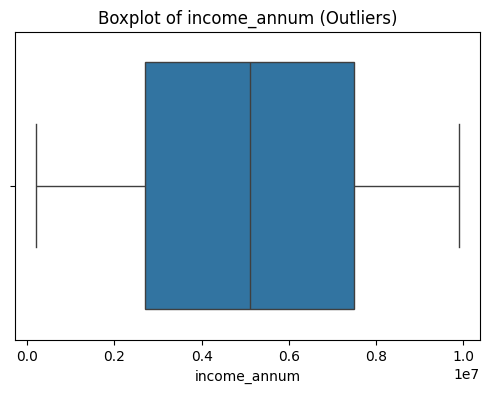

<Figure size 600x400 with 0 Axes>

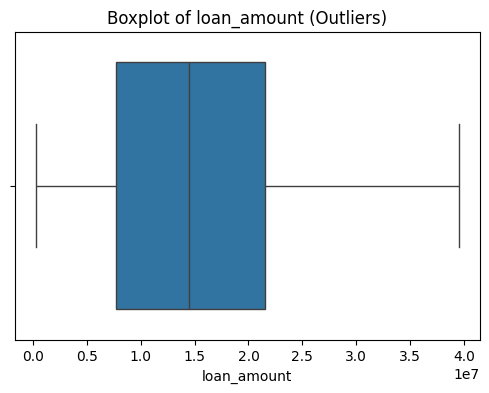

<Figure size 600x400 with 0 Axes>

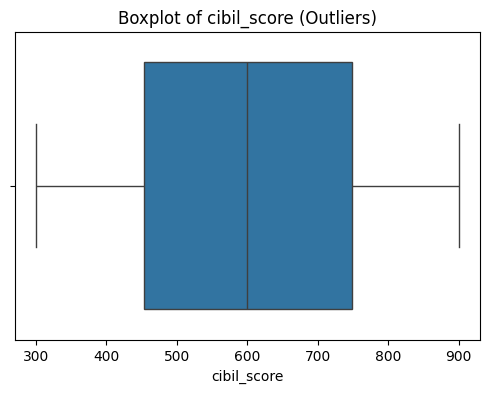

<Figure size 600x400 with 0 Axes>

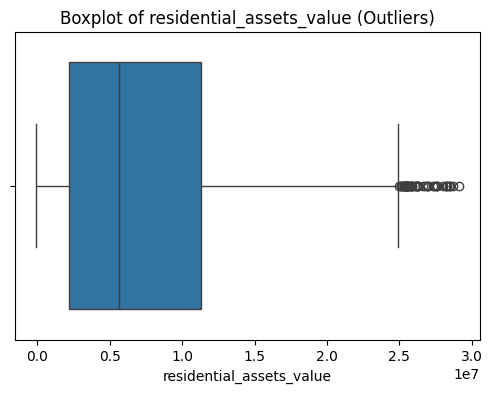

<Figure size 600x400 with 0 Axes>

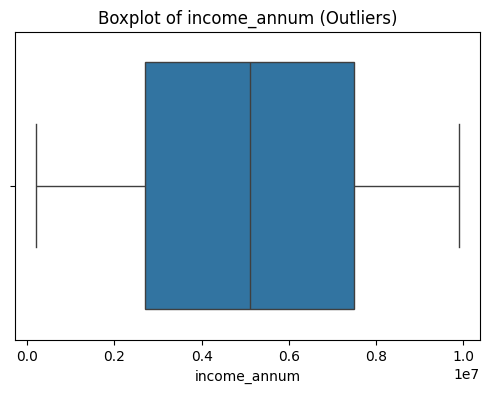

<Figure size 600x400 with 0 Axes>

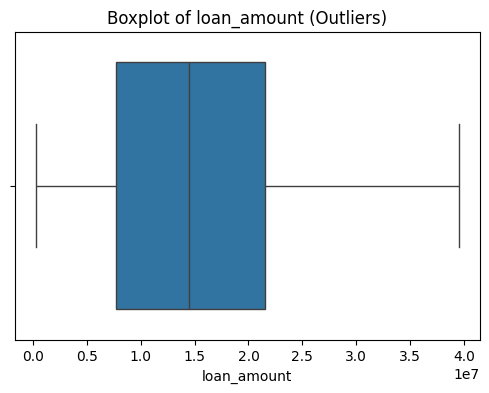

<Figure size 600x400 with 0 Axes>

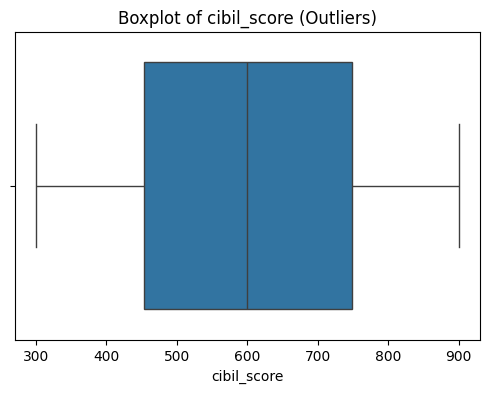

<Figure size 600x400 with 0 Axes>

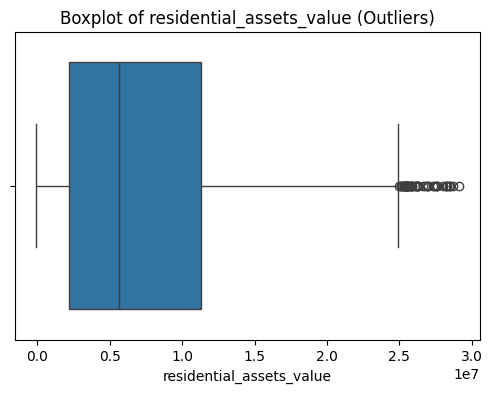

<Figure size 600x400 with 0 Axes>

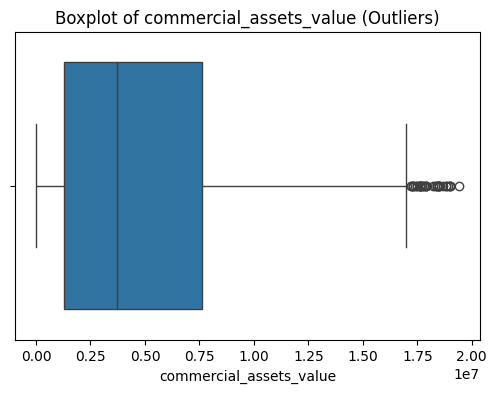

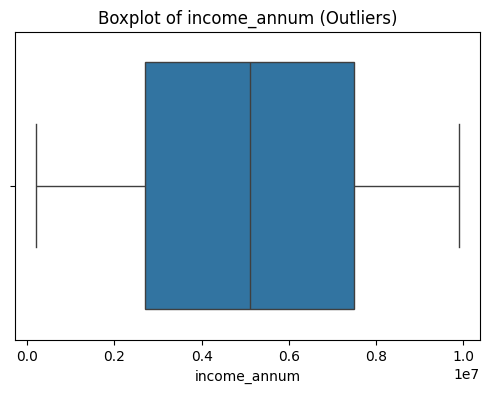

<Figure size 600x400 with 0 Axes>

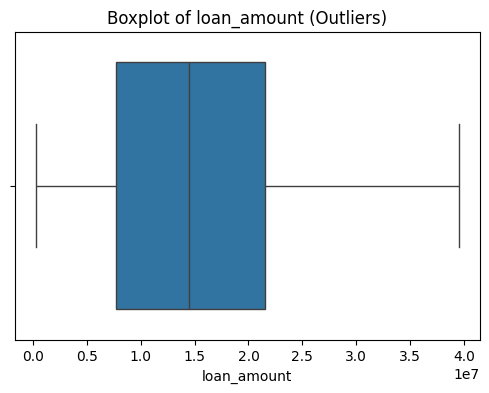

<Figure size 600x400 with 0 Axes>

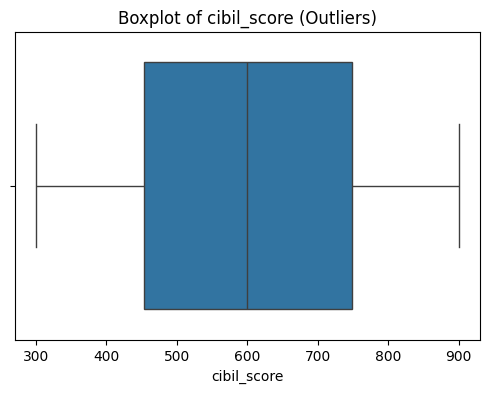

<Figure size 600x400 with 0 Axes>

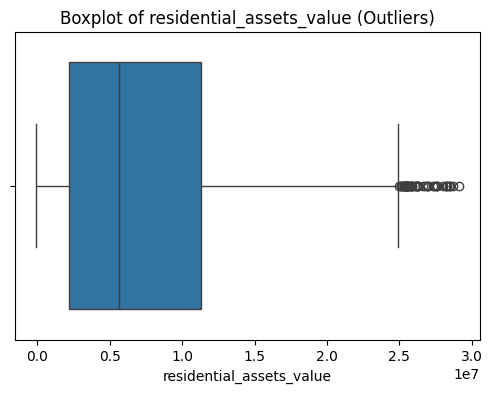

<Figure size 600x400 with 0 Axes>

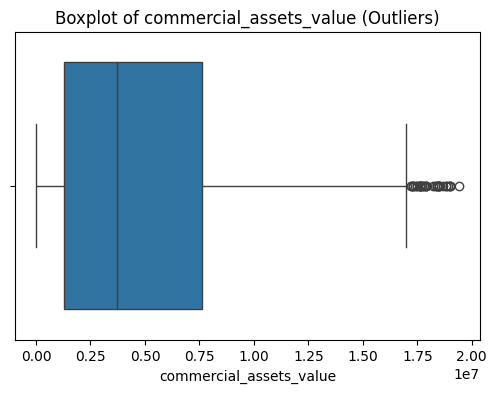

<Figure size 600x400 with 0 Axes>

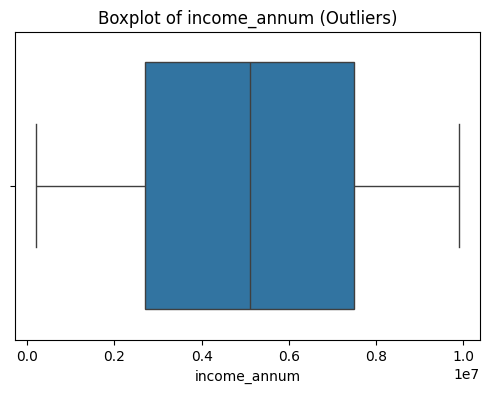

<Figure size 600x400 with 0 Axes>

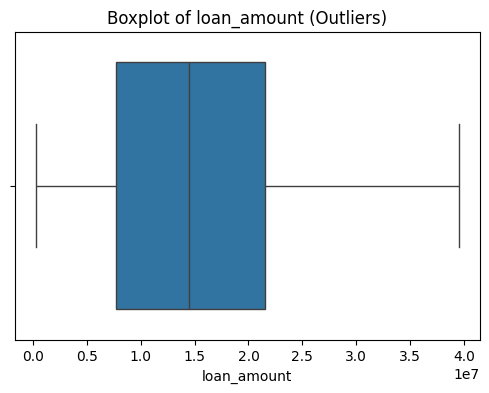

<Figure size 600x400 with 0 Axes>

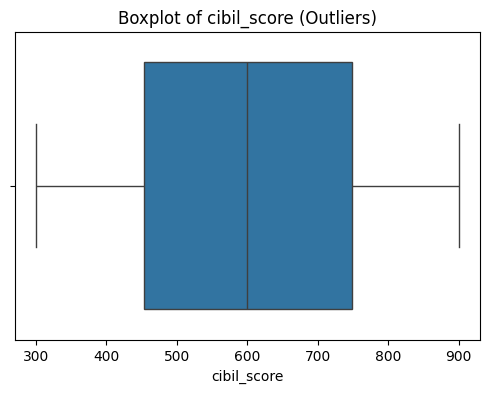

<Figure size 600x400 with 0 Axes>

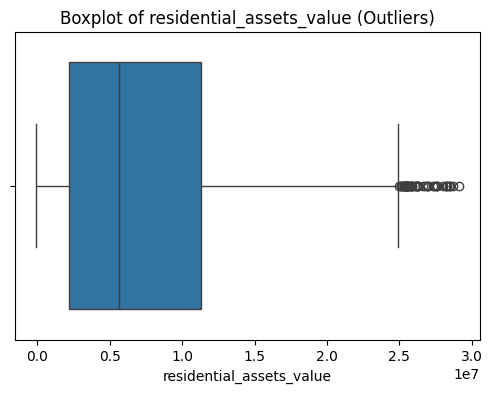

<Figure size 600x400 with 0 Axes>

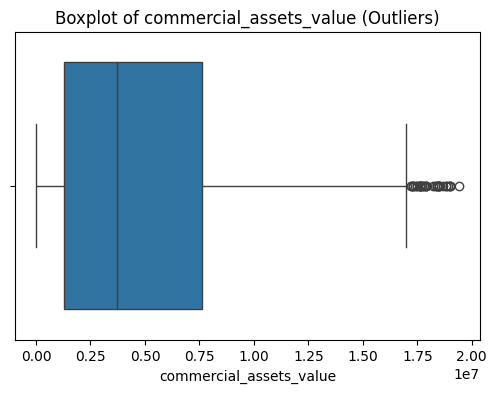

<Figure size 600x400 with 0 Axes>

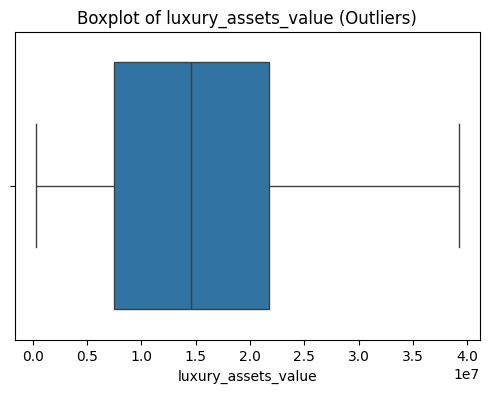

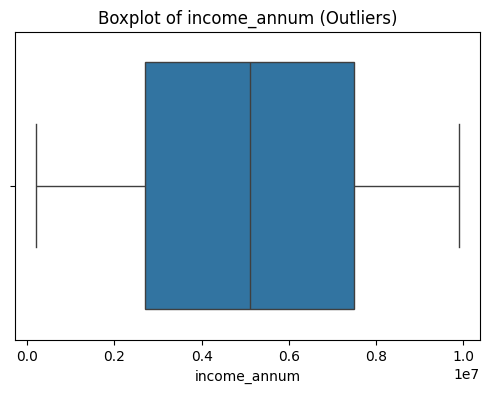

<Figure size 600x400 with 0 Axes>

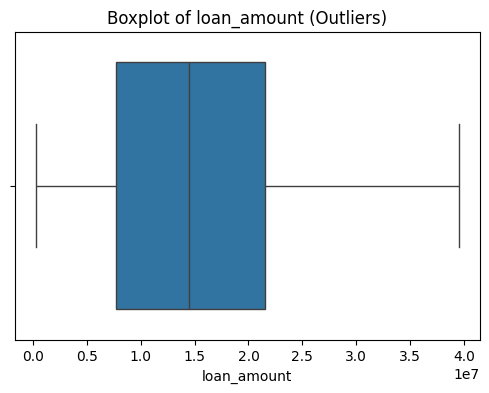

<Figure size 600x400 with 0 Axes>

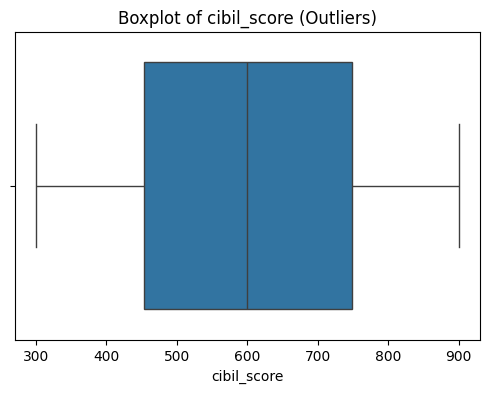

<Figure size 600x400 with 0 Axes>

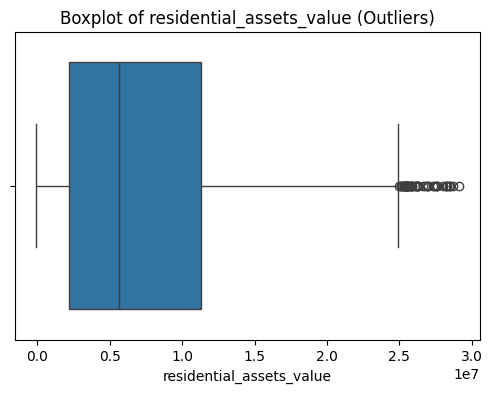

<Figure size 600x400 with 0 Axes>

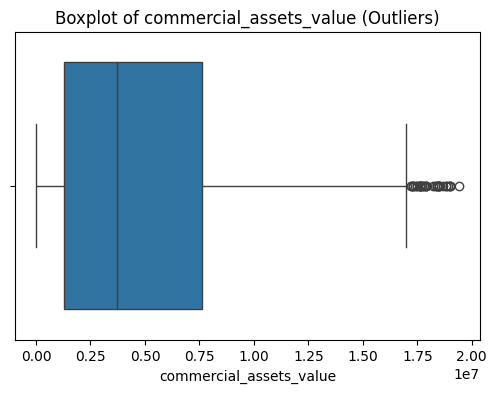

<Figure size 600x400 with 0 Axes>

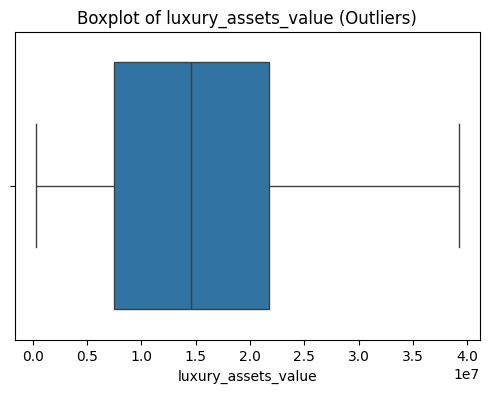

<Figure size 600x400 with 0 Axes>

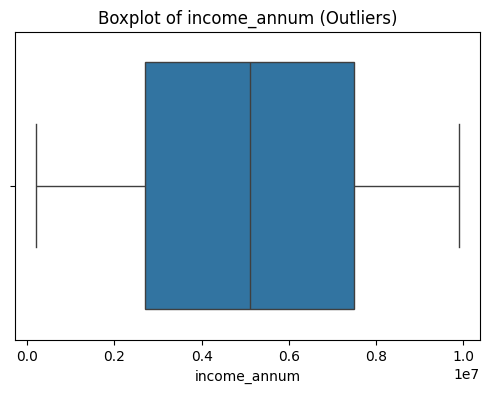

<Figure size 600x400 with 0 Axes>

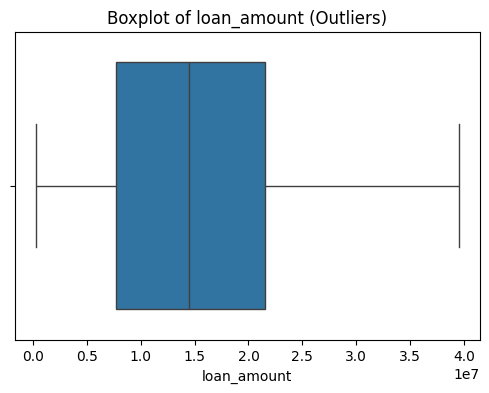

<Figure size 600x400 with 0 Axes>

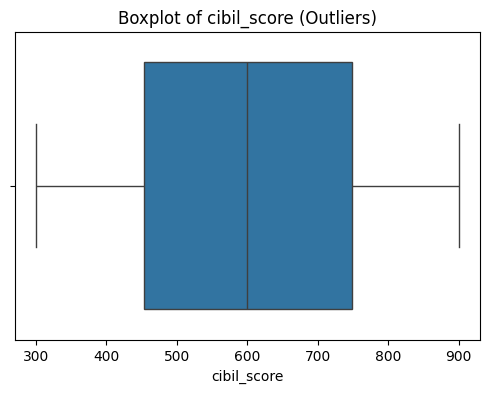

<Figure size 600x400 with 0 Axes>

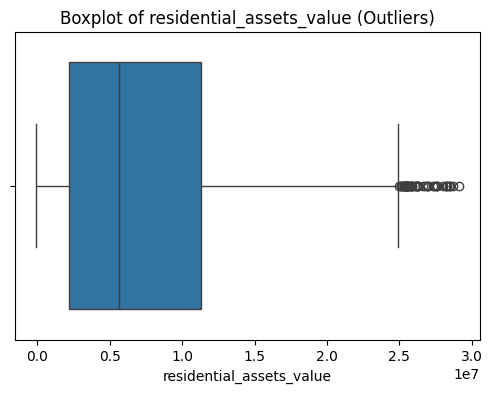

<Figure size 600x400 with 0 Axes>

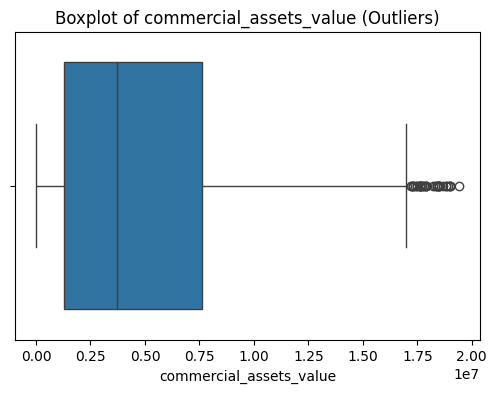

<Figure size 600x400 with 0 Axes>

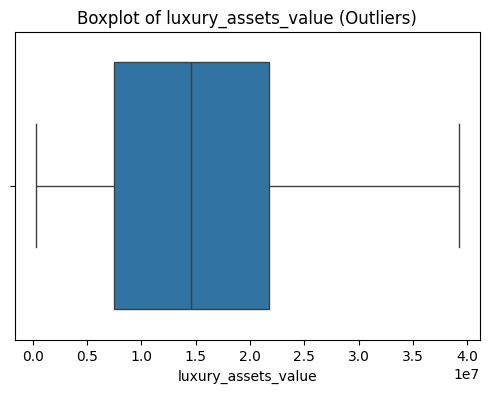

<Figure size 600x400 with 0 Axes>

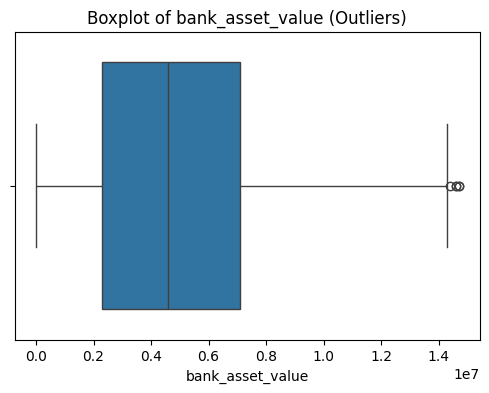

<Figure size 600x400 with 0 Axes>

In [11]:
# Visualize outliers in continuous features using boxplots and scatter plots
for feature in continuous_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature} (Outliers)')
    plt.show()
    plt.figure(figsize=(6,4))
    

### res asset and commercial asset and bank asset has outliers , i think it is logical values so i will try capping not drop them 

In [12]:
# Remove outliers using IQR method for selected features
# 1. Capping outliers for asset columns using IQR method
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
    return df
asset_cols = ['residential_assets_value', 'commercial_assets_value', 'bank_asset_value']
for col in asset_cols:
    df = cap_outliers(df, col)

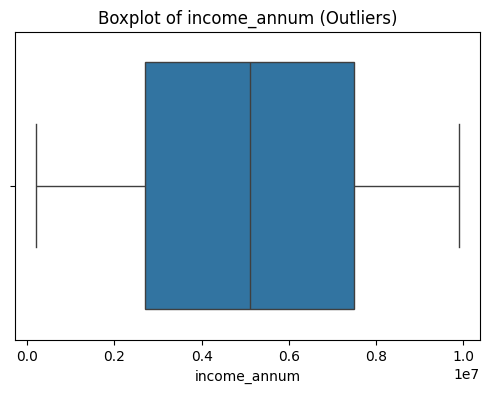

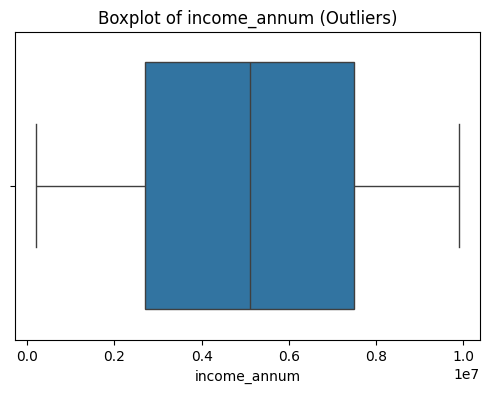

<Figure size 600x400 with 0 Axes>

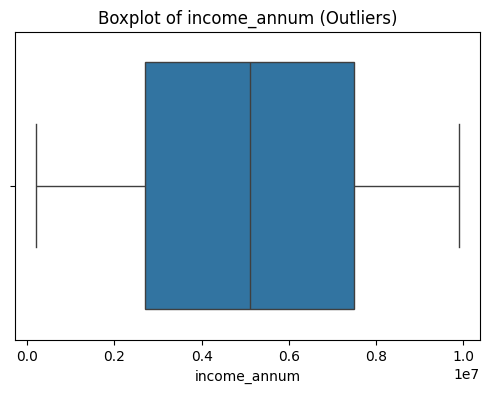

<Figure size 600x400 with 0 Axes>

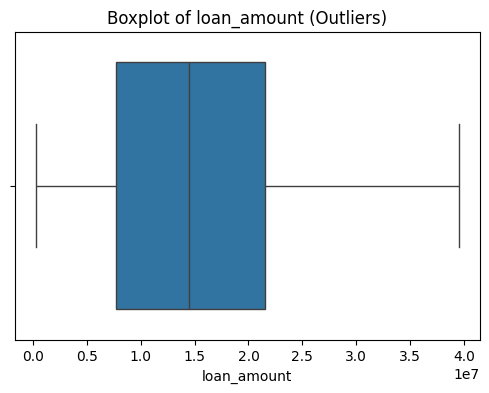

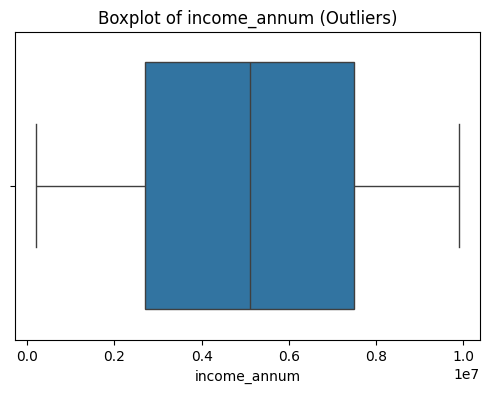

<Figure size 600x400 with 0 Axes>

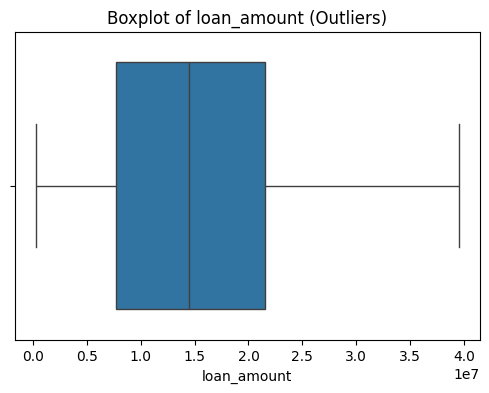

<Figure size 600x400 with 0 Axes>

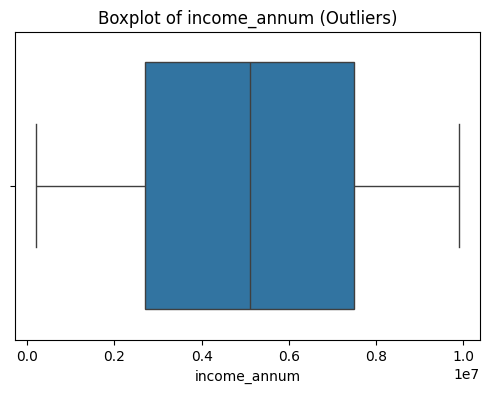

<Figure size 600x400 with 0 Axes>

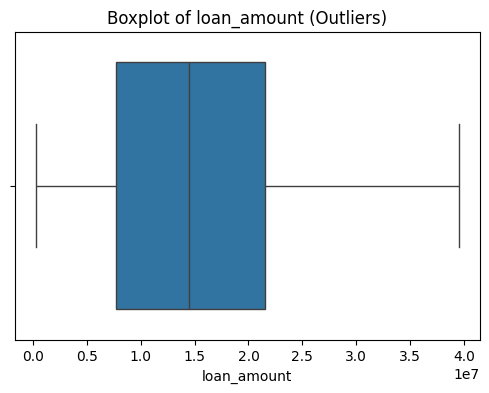

<Figure size 600x400 with 0 Axes>

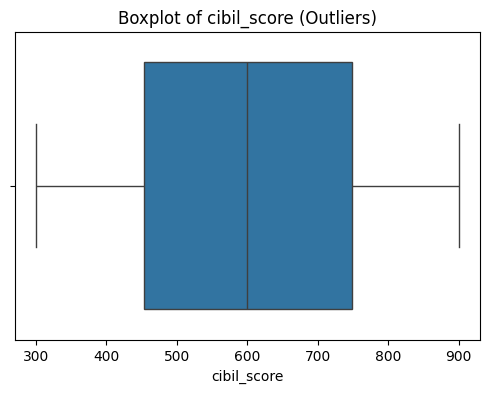

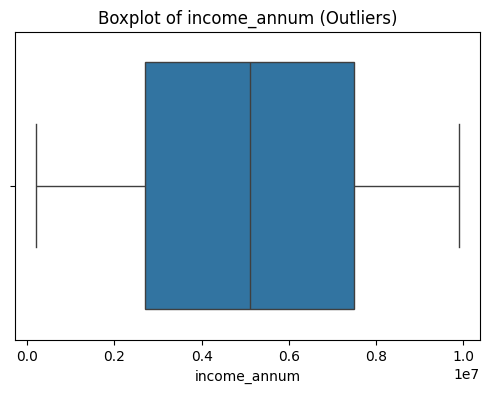

<Figure size 600x400 with 0 Axes>

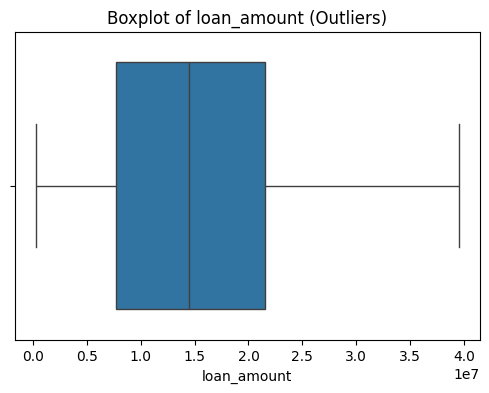

<Figure size 600x400 with 0 Axes>

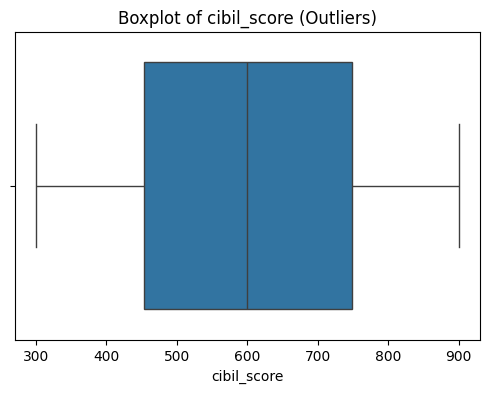

<Figure size 600x400 with 0 Axes>

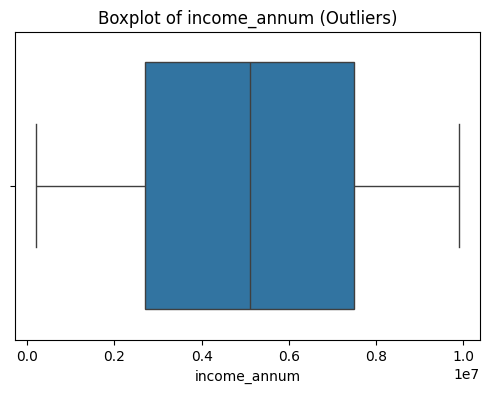

<Figure size 600x400 with 0 Axes>

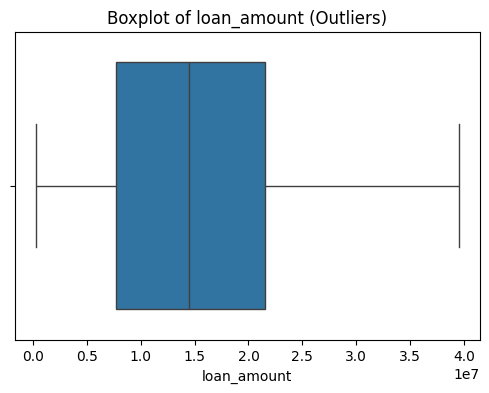

<Figure size 600x400 with 0 Axes>

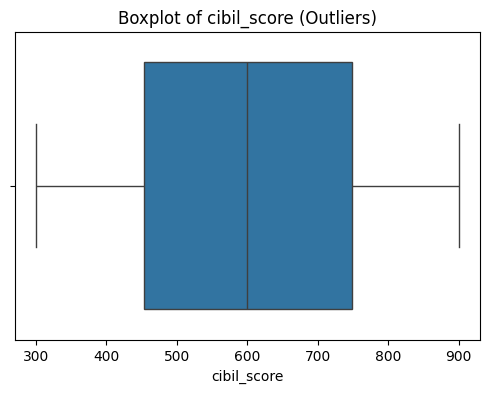

<Figure size 600x400 with 0 Axes>

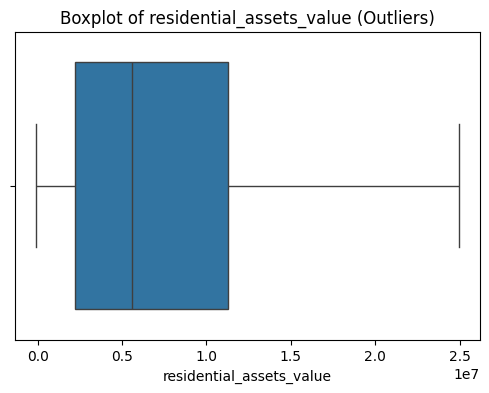

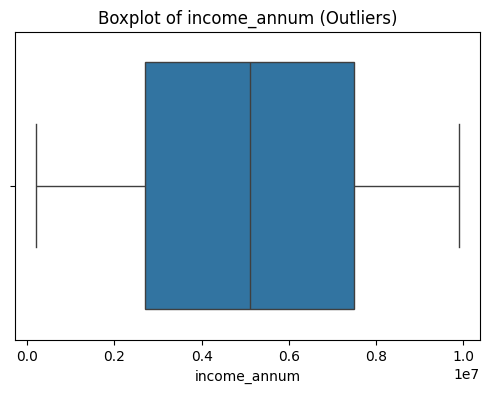

<Figure size 600x400 with 0 Axes>

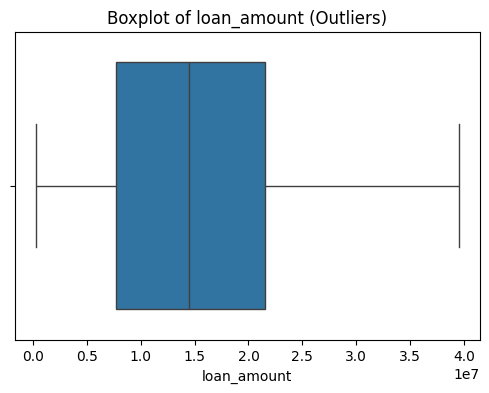

<Figure size 600x400 with 0 Axes>

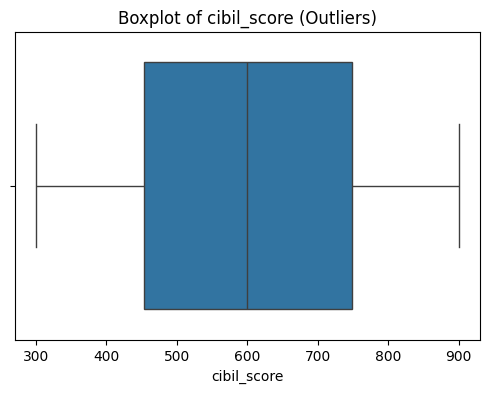

<Figure size 600x400 with 0 Axes>

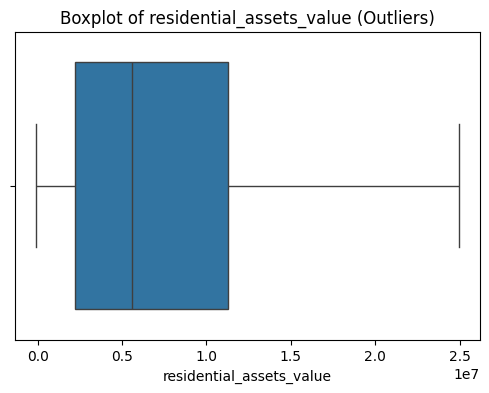

<Figure size 600x400 with 0 Axes>

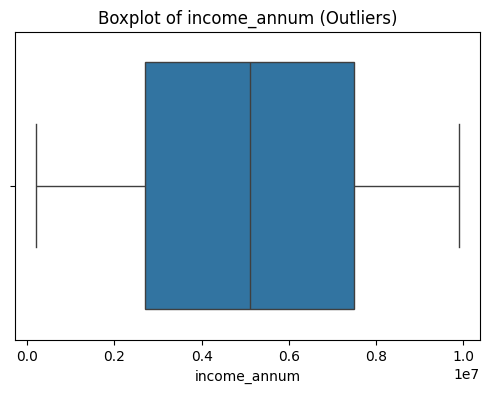

<Figure size 600x400 with 0 Axes>

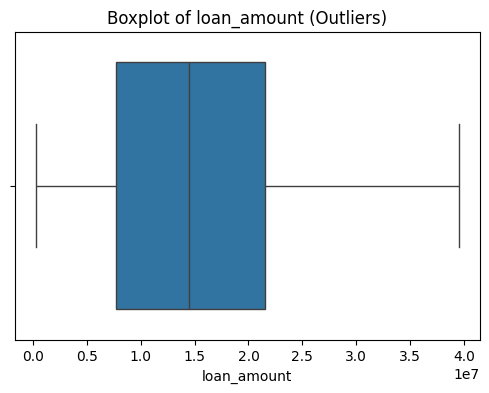

<Figure size 600x400 with 0 Axes>

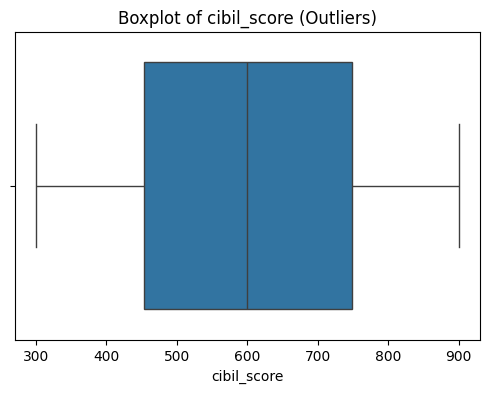

<Figure size 600x400 with 0 Axes>

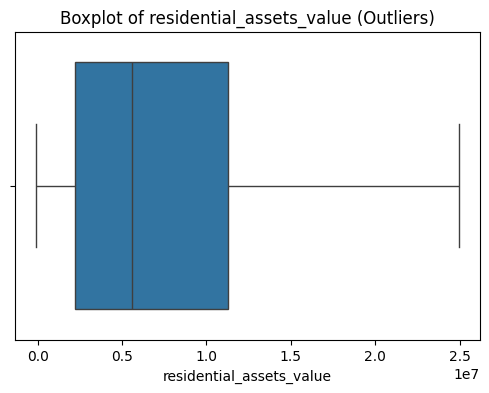

<Figure size 600x400 with 0 Axes>

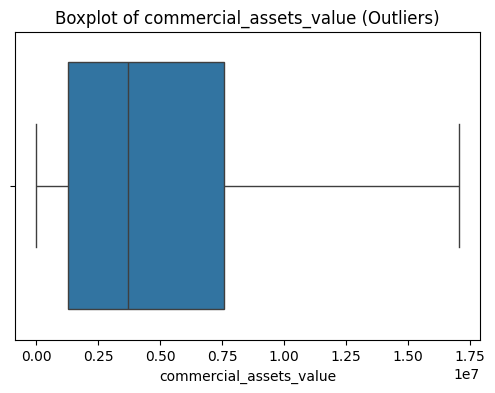

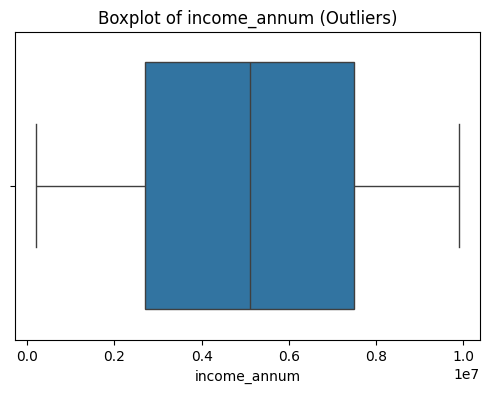

<Figure size 600x400 with 0 Axes>

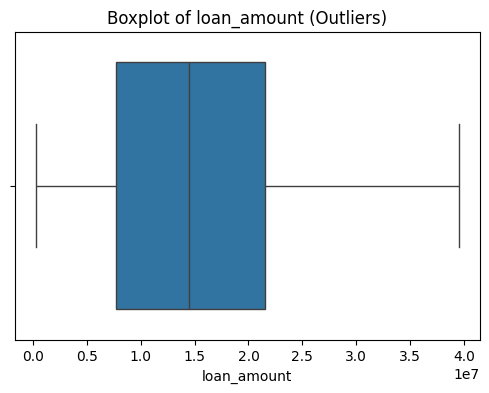

<Figure size 600x400 with 0 Axes>

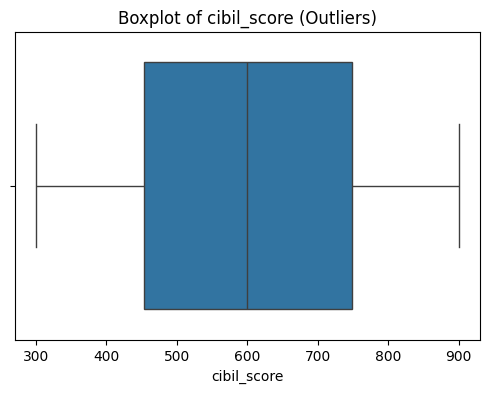

<Figure size 600x400 with 0 Axes>

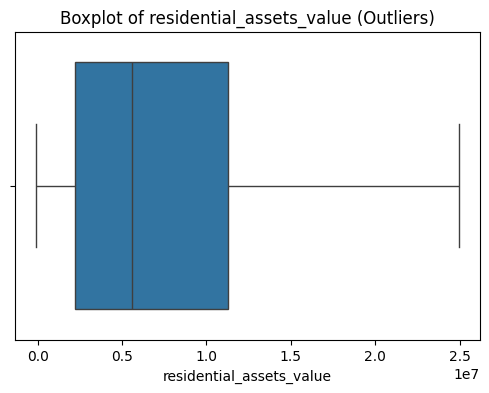

<Figure size 600x400 with 0 Axes>

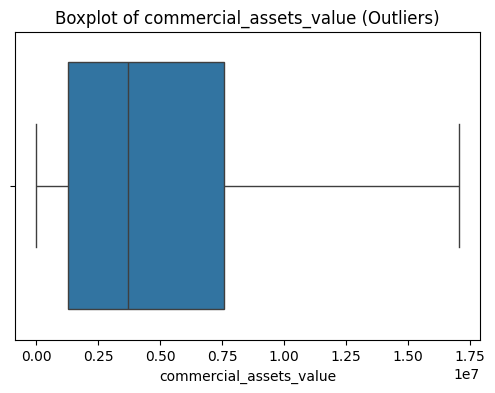

<Figure size 600x400 with 0 Axes>

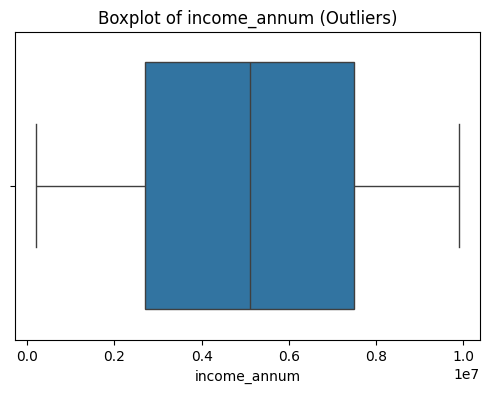

<Figure size 600x400 with 0 Axes>

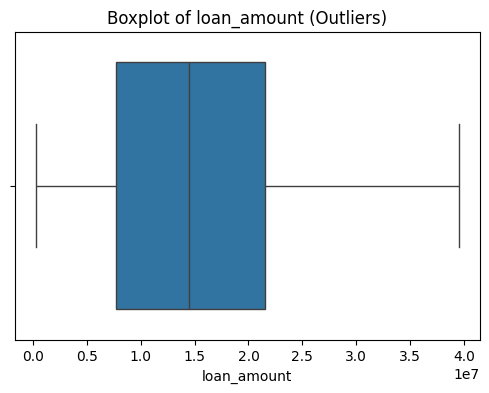

<Figure size 600x400 with 0 Axes>

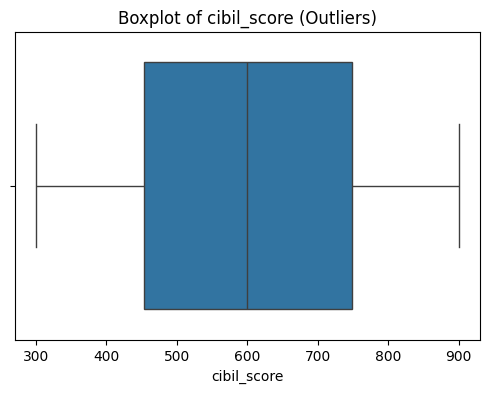

<Figure size 600x400 with 0 Axes>

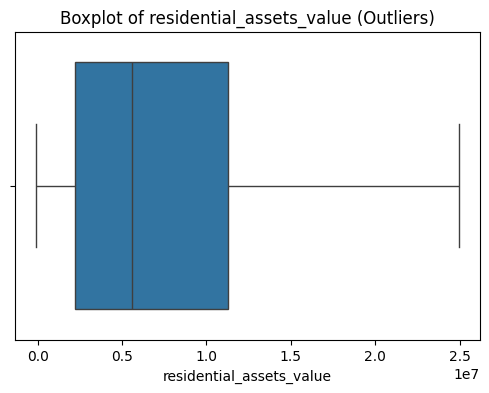

<Figure size 600x400 with 0 Axes>

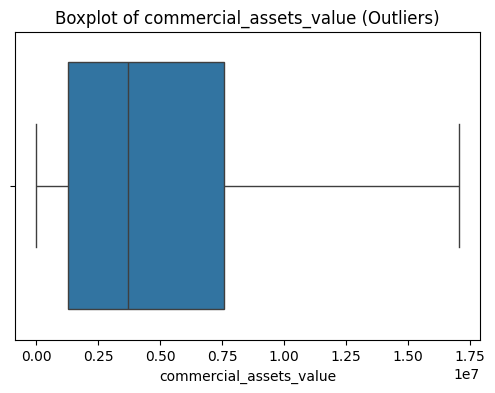

<Figure size 600x400 with 0 Axes>

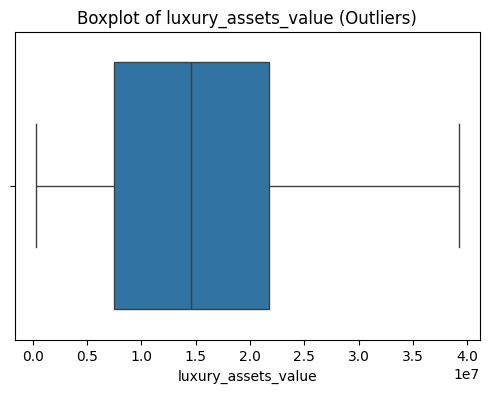

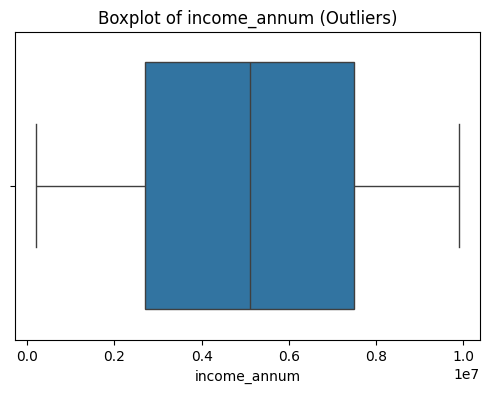

<Figure size 600x400 with 0 Axes>

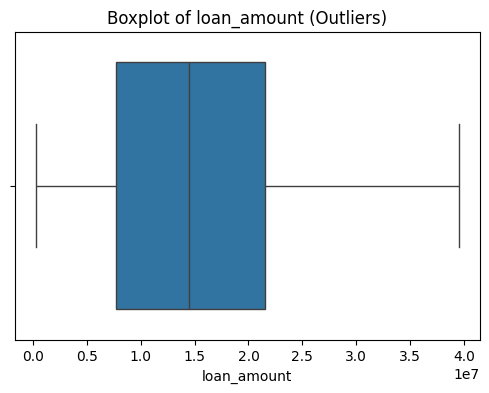

<Figure size 600x400 with 0 Axes>

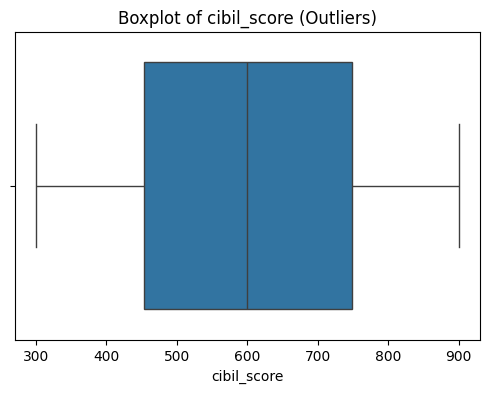

<Figure size 600x400 with 0 Axes>

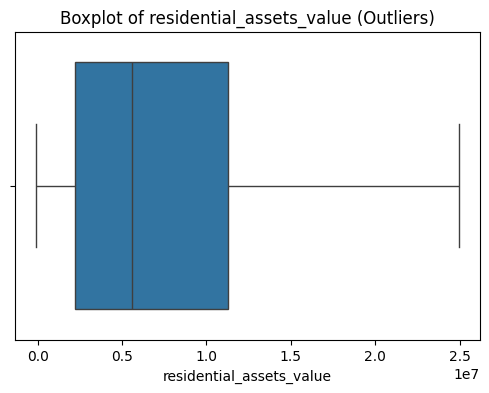

<Figure size 600x400 with 0 Axes>

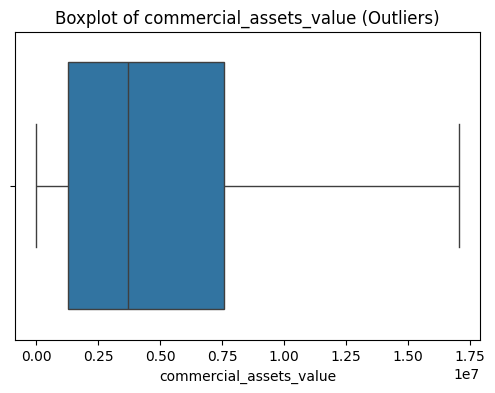

<Figure size 600x400 with 0 Axes>

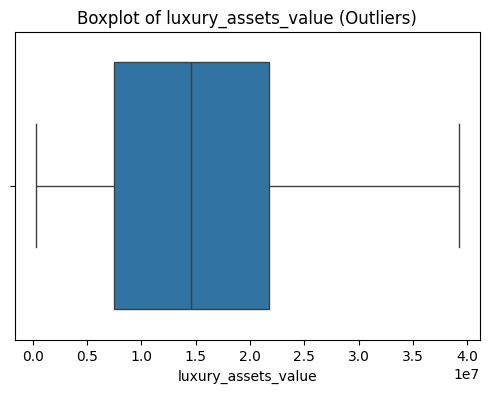

<Figure size 600x400 with 0 Axes>

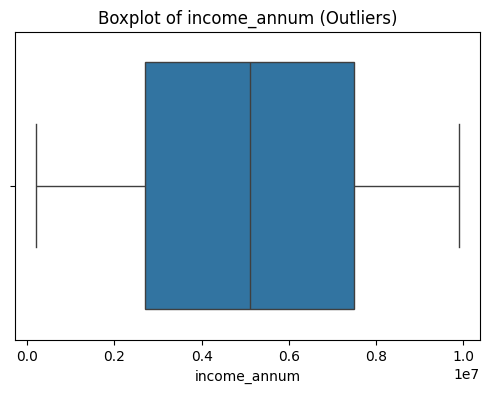

<Figure size 600x400 with 0 Axes>

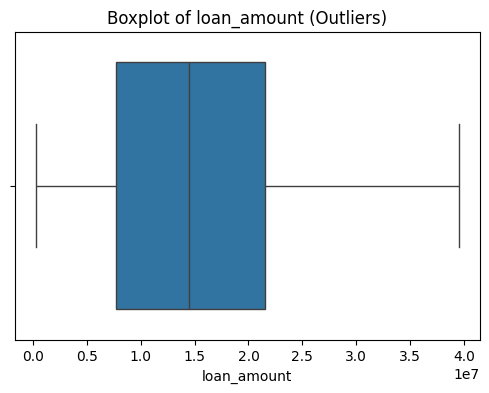

<Figure size 600x400 with 0 Axes>

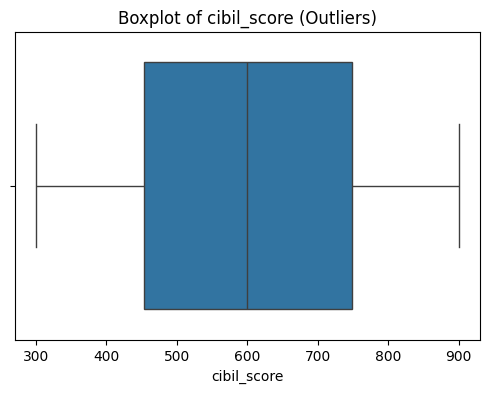

<Figure size 600x400 with 0 Axes>

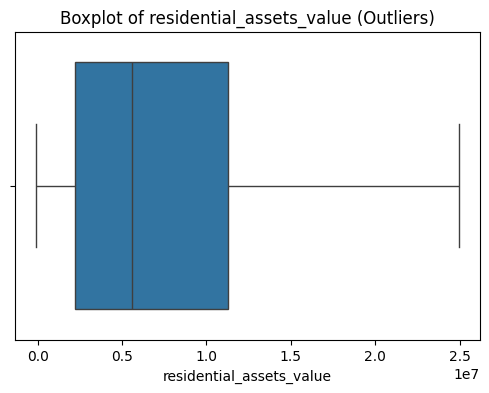

<Figure size 600x400 with 0 Axes>

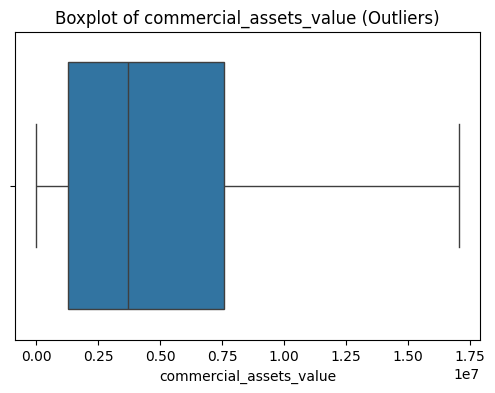

<Figure size 600x400 with 0 Axes>

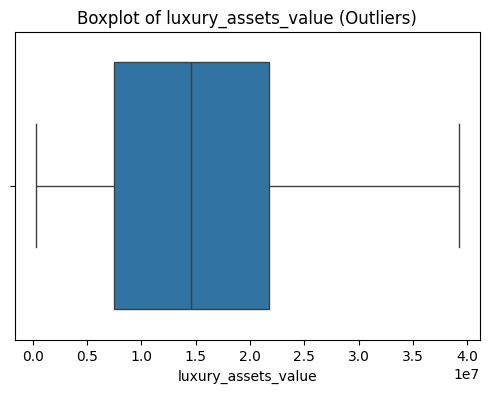

<Figure size 600x400 with 0 Axes>

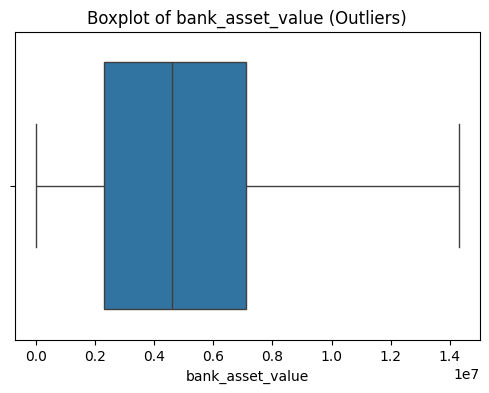

<Figure size 600x400 with 0 Axes>

In [13]:
# Visualize outliers in continuous features using boxplots and scatter plots
for feature in continuous_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature} (Outliers)')
    plt.show()
    plt.figure(figsize=(6,4))
    

# No Duplicates

In [14]:
# Check for duplicated rows in the dataframe
duplicates = df.duplicated().sum()
print(f'Total duplicated rows: {duplicates}')
if duplicates > 0:
    print('Preview of duplicated rows:')
    display(df[df.duplicated()])

Total duplicated rows: 0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [16]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.454861e+06,4.964289e+06,1.512631e+07,4.976341e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.452442e+06,4.363080e+06,9.103754e+06,3.249159e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.495000e+07,1.705000e+07,3.920000e+07,1.430000e+07


In [17]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17050000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Handle Cat Data 

In [18]:
# Show value counts for each categorical variable
for feature in categorical_features:
    print(f'Value counts for {feature}:')
    print(df[feature].value_counts(dropna=False))
    print('-'*40)

Value counts for education:
education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64
----------------------------------------
Value counts for self_employed:
self_employed
Yes    2150
No     2119
Name: count, dtype: int64
----------------------------------------
Value counts for loan_status:
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64
----------------------------------------


In [19]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17050000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [20]:
# Convert boolean columns to 0/1 and move target column to last position
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['loan_status'] = le.fit_transform(df['loan_status'])
one_hot_features = [f for f in categorical_features if f != 'loan_status']
df = pd.get_dummies(df, columns=one_hot_features, drop_first=False)
# Convert all boolean columns to int (0/1)
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)
# Move target column to last position
target = df.pop('loan_status')
df['loan_status'] = target
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_status
0,2,9600000,29900000,12,778,2400000,17050000,22700000,8000000,1,0,1,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,1,0,1
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,1,0,1
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0,1,1


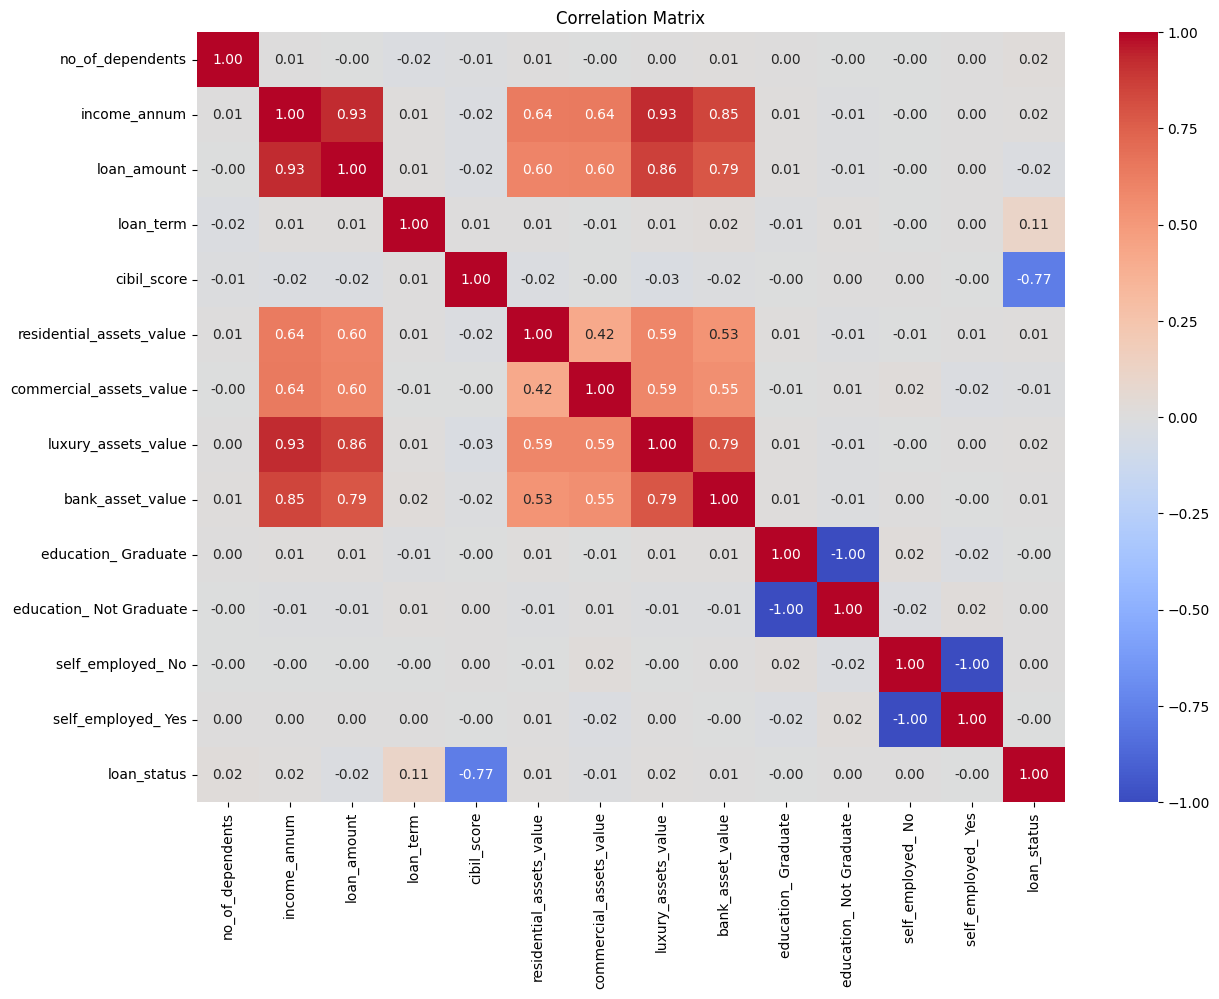

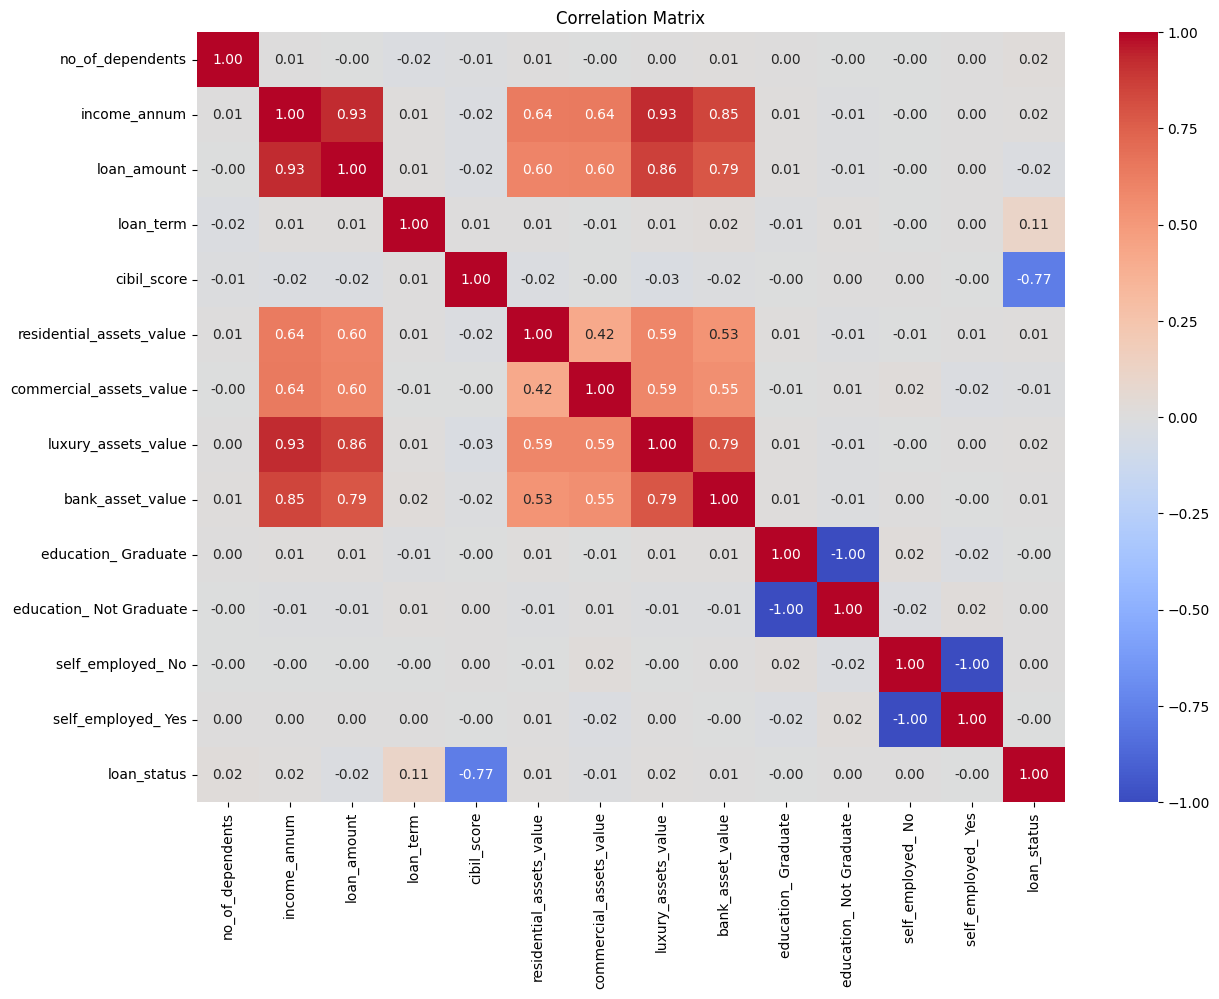

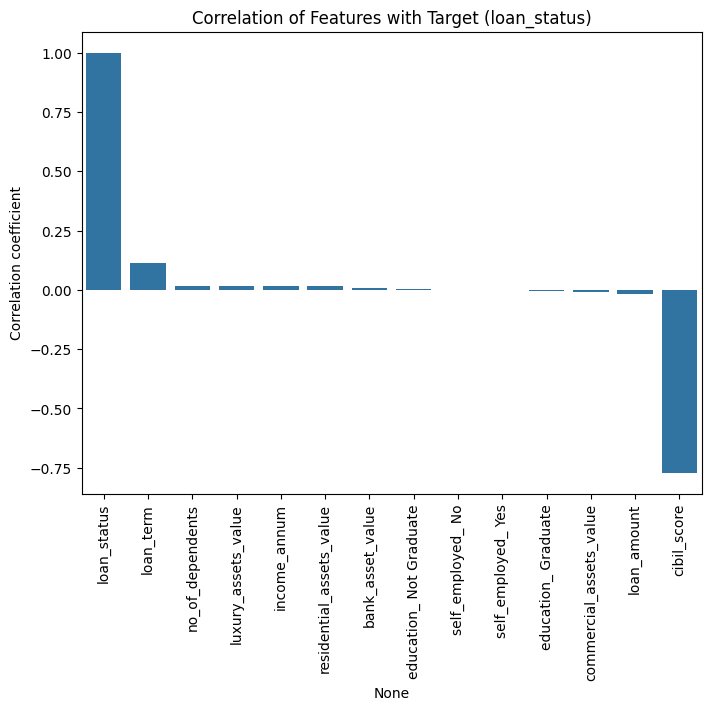

In [ ]:
# Visualize correlation matrix and correlation with target

# Correlation matrix for all features
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# Correlation with target variable
corr_with_target = df.corr()['loan_status'].sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with Target (loan_status)')
plt.ylabel('Correlation coefficient')
plt.show()

In [22]:
df.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'education_ Graduate',
       'education_ Not Graduate', 'self_employed_ No', 'self_employed_ Yes',
       'loan_status'],
      dtype='object')

In [23]:
df['loan_status'].value_counts()

loan_status
0    2656
1    1613
Name: count, dtype: int64

# imbalanced Target

In [24]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_status
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.454861e+06,4.964289e+06,1.512631e+07,4.976341e+06,0.502225,0.497775,0.496369,0.503631,0.377840
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.452442e+06,4.363080e+06,9.103754e+06,3.249159e+06,0.500054,0.500054,0.500045,0.500045,0.484904
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.495000e+07,1.705000e+07,3.920000e+07,1.430000e+07,1.000000,1.000000,1.000000,1.000000,1.000000


## Split data before scaling to avoid data leakage 


In [26]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (3415, 13)
Test shape: (854, 13)


### After capping outliers and data is skewed , i think robust scaler will be useful for continious Features

In [28]:
# Apply RobustScaler to continuous features after splitting to avoid data leakage
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

print('Continuous features after Robust Scaling (Train):')
display(X_train[continuous_features].describe())

Continuous features after Robust Scaling (Train):


,income_annum,loan_amount,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000
mean,0.008247,0.047551,0.007484,0.199762,0.201637,0.042085,0.093003
std,0.571142,0.656755,0.583356,0.710164,0.696767,0.636519,0.674311
min,-0.979592,-1.029197,-1.000000,-0.633333,-0.596774,-0.993007,-0.937500
25%,-0.489796,-0.489051,-0.489865,-0.377778,-0.370968,-0.496503,-0.458333
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.510204,0.510949,0.510135,0.622222,0.629032,0.503497,0.541667
max,1.000000,1.832117,1.027027,2.150000,2.153226,1.727273,2.041667


In [29]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_status
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.454861e+06,4.964289e+06,1.512631e+07,4.976341e+06,0.502225,0.497775,0.496369,0.503631,0.377840
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.452442e+06,4.363080e+06,9.103754e+06,3.249159e+06,0.500054,0.500054,0.500045,0.500045,0.484904
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.495000e+07,1.705000e+07,3.920000e+07,1.430000e+07,1.000000,1.000000,1.000000,1.000000,1.000000


## Over Sampling

In [31]:
# Oversample the minority class using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('Original training set class distribution:')
print(y_train.value_counts())
print('Resampled training set class distribution:')
print(pd.Series(y_train_resampled).value_counts())

Original training set class distribution:
loan_status
0    2125
1    1290
Name: count, dtype: int64
Resampled training set class distribution:
loan_status
1    2125
0    2125
Name: count, dtype: int64


## Apply Cv to check performance in Train

In [34]:
# Try cross-validation for each model before final evaluation
from sklearn.model_selection import cross_val_score
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42)
}

for name, model in models.items():
    print(f'\nCross-validation for {name}')
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    print('CV Accuracy scores:', scores)
    print('Mean CV Accuracy:', scores.mean())


Cross-validation for Logistic Regression
CV Accuracy scores: [0.91411765 0.92352941 0.91529412 0.94117647 0.94705882]
Mean CV Accuracy: 0.9282352941176472

Cross-validation for Random Forest
CV Accuracy scores: [0.98117647 0.98352941 0.97411765 0.98117647 0.98470588]
Mean CV Accuracy: 0.9809411764705882

Cross-validation for SVM
CV Accuracy scores: [0.92235294 0.93411765 0.91411765 0.93764706 0.92705882]
Mean CV Accuracy: 0.9270588235294117


In [33]:
# Try several models and show classification reports and accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42)
}

for name, model in models.items():
    print(f'\nModel: {name}')
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.9333
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       531
           1       0.91      0.92      0.91       323

    accuracy                           0.93       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854


Model: Random Forest
Accuracy: 0.9801
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       531
           1       0.98      0.97      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854


Model: SVM
Accuracy: 0.9801
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       531
           1       0.98      0.97      0.97       323

    accuracy                           0.98       854
   macro avg   

### Best is RF :Ensemble ML 

In [35]:
# Train Random Forest and print accuracy, classification report, and confusion matrix
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred = rf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9800936768149883
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       531
           1       0.98      0.97      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Confusion Matrix:
[[524   7]
 [ 10 313]]


## Confution Matrix for best Model 

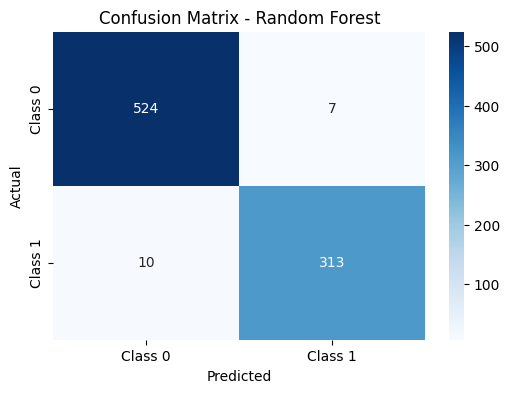

In [36]:
# Visualize confusion matrix for Random Forest predictions

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### Save it to use it in Deployment Phase 

In [37]:
# Save the trained Random Forest model as a pickle file
import joblib
joblib.dump(rf, r'D:\random_forest_model.pkl')
print('Model saved as D:\\random_forest_model.pkl')

Model saved as D:\random_forest_model.pkl


In [1]:
import mlflow
logged_model = 'runs:/ca5c7b67926647319f011cefc5c76374/RandomForest/RF_no_balance'
data=[2,6700000,22700000,18,538,15300000,5800000,20400000,6400000,0,1,0,1,1]
# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(data))

ModuleNotFoundError: No module named 'mlflow'